<a href="https://colab.research.google.com/github/Nicolas-BZRD/NLP-Classification-Toxic-Comments/blob/main/Classification_toxic_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Regex to clean up sentences
import re

#tf_idf
import nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split  

pd.options.display.max_colwidth = 500

# Importing data

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Google_Colab/NLP_Classification_Toxic_Comments/train.csv')
data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


# First look

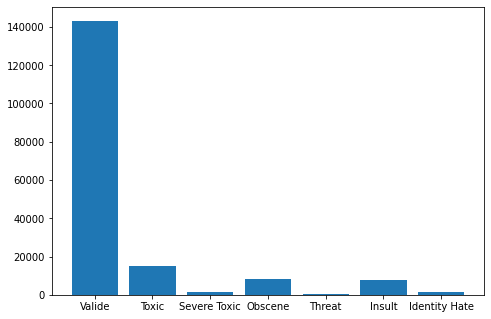

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
types = ['Valide', 'Toxic', 'Severe Toxic','Obscene', 'Threat', 'Insult', 'Identity Hate']
values = [
          len(data[(data['toxic'] == 0) & (data['severe_toxic'] == 0) & (data['obscene'] == 0) & (data['threat'] == 0) & (data['insult'] == 0) & (data['identity_hate'] == 0)]),
          data['toxic'].value_counts()[1],
          data['severe_toxic'].value_counts()[1],
          data['obscene'].value_counts()[1],
          data['threat'].value_counts()[1],
          data['insult'].value_counts()[1],
          data['identity_hate'].value_counts()[1],
          ]
ax.bar(types,values)
plt.show()

In [5]:
print("Number comments in dataframe : {}".format(len(data.index)))

Number comments in dataframe : 159571


Compute max length of a comment:

In [6]:
max_length = max(len(comment.split()) for comment in data["comment_text"])

print("Max size comment : {}".format(max_length))

Max size comment : 1411


Average size of a comment:

In [7]:
average_size = 0
for line in data["comment_text"]:
  words = line.split()
  average_size = average_size + len(words)
average_size = average_size/len(data.index)

print("Average size comment : {} ".format(average_size))

Average size comment : 67.27352714465661 


# 1 - First try with a simple ML to get first idea

# Preparation of the data

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
df_idf = data.copy()

Clean up tweets: contractions are separated, special characters are removed, as well as URLs, mentions, short words and empty words.

In [10]:
def clean(sentence): 
            
    # Contractions
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"there's", "there is", sentence)
    sentence = re.sub(r"We're", "We are", sentence)
    sentence = re.sub(r"That's", "That is", sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"they're", "they are", sentence)
    sentence = re.sub(r"Can't", "Cannot", sentence)
    sentence = re.sub(r"wasn't", "was not", sentence)
    sentence = re.sub(r"don\x89Ûªt", "do not", sentence)
    sentence = re.sub(r"aren't", "are not", sentence)
    sentence = re.sub(r"isn't", "is not", sentence)
    sentence = re.sub(r"What's", "What is", sentence)
    sentence = re.sub(r"haven't", "have not", sentence)
    sentence = re.sub(r"hasn't", "has not", sentence)
    sentence = re.sub(r"There's", "There is", sentence)
    sentence = re.sub(r"He's", "He is", sentence)
    sentence = re.sub(r"It's", "It is", sentence)
    sentence = re.sub(r"You're", "You are", sentence)
    sentence = re.sub(r"I'M", "I am", sentence)
    sentence = re.sub(r"shouldn't", "should not", sentence)
    sentence = re.sub(r"wouldn't", "would not", sentence)
    sentence = re.sub(r"i'm", "I am", sentence)
    sentence = re.sub(r"I\x89Ûªm", "I am", sentence)
    sentence = re.sub(r"I'm", "I am", sentence)
    sentence = re.sub(r"Isn't", "is not", sentence)
    sentence = re.sub(r"Here's", "Here is", sentence)
    sentence = re.sub(r"you've", "you have", sentence)
    sentence = re.sub(r"you\x89Ûªve", "you have", sentence)
    sentence = re.sub(r"we're", "we are", sentence)
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"couldn't", "could not", sentence)
    sentence = re.sub(r"we've", "we have", sentence)
    sentence = re.sub(r"it\x89Ûªs", "it is", sentence)
    sentence = re.sub(r"doesn\x89Ûªt", "does not", sentence)
    sentence = re.sub(r"It\x89Ûªs", "It is", sentence)
    sentence = re.sub(r"Here\x89Ûªs", "Here is", sentence)
    sentence = re.sub(r"who's", "who is", sentence)
    sentence = re.sub(r"I\x89Ûªve", "I have", sentence)
    sentence = re.sub(r"y'all", "you all", sentence)
    sentence = re.sub(r"can\x89Ûªt", "cannot", sentence)
    sentence = re.sub(r"would've", "would have", sentence)
    sentence = re.sub(r"it'll", "it will", sentence)
    sentence = re.sub(r"we'll", "we will", sentence)
    sentence = re.sub(r"wouldn\x89Ûªt", "would not", sentence)
    sentence = re.sub(r"We've", "We have", sentence)
    sentence = re.sub(r"he'll", "he will", sentence)
    sentence = re.sub(r"Y'all", "You all", sentence)
    sentence = re.sub(r"Weren't", "Were not", sentence)
    sentence = re.sub(r"Didn't", "Did not", sentence)
    sentence = re.sub(r"they'll", "they will", sentence)
    sentence = re.sub(r"they'd", "they would", sentence)
    sentence = re.sub(r"DON'T", "DO NOT", sentence)
    sentence = re.sub(r"That\x89Ûªs", "That is", sentence)
    sentence = re.sub(r"they've", "they have", sentence)
    sentence = re.sub(r"i'd", "I would", sentence)
    sentence = re.sub(r"should've", "should have", sentence)
    sentence = re.sub(r"You\x89Ûªre", "You are", sentence)
    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"Don\x89Ûªt", "Do not", sentence)
    sentence = re.sub(r"we'd", "we would", sentence)
    sentence = re.sub(r"i'll", "I will", sentence)
    sentence = re.sub(r"weren't", "were not", sentence)
    sentence = re.sub(r"They're", "They are", sentence)
    sentence = re.sub(r"Can\x89Ûªt", "Cannot", sentence)
    sentence = re.sub(r"you\x89Ûªll", "you will", sentence)
    sentence = re.sub(r"I\x89Ûªd", "I would", sentence)
    sentence = re.sub(r"let's", "let us", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"don't", "do not", sentence)
    sentence = re.sub(r"you're", "you are", sentence)
    sentence = re.sub(r"i've", "I have", sentence)
    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"i'll", "I will", sentence)
    sentence = re.sub(r"doesn't", "does not", sentence)
    sentence = re.sub(r"i'd", "I would", sentence)
    sentence = re.sub(r"didn't", "did not", sentence)
    sentence = re.sub(r"ain't", "am not", sentence)
    sentence = re.sub(r"you'll", "you will", sentence)
    sentence = re.sub(r"I've", "I have", sentence)
    sentence = re.sub(r"Don't", "do not", sentence)
    sentence = re.sub(r"I'll", "I will", sentence)
    sentence = re.sub(r"I'd", "I would", sentence)
    sentence = re.sub(r"Let's", "Let us", sentence)
    sentence = re.sub(r"you'd", "You would", sentence)
    sentence = re.sub(r"It's", "It is", sentence)
    sentence = re.sub(r"Ain't", "am not", sentence)
    sentence = re.sub(r"Haven't", "Have not", sentence)
    sentence = re.sub(r"Could've", "Could have", sentence)
    sentence = re.sub(r"youve", "you have", sentence)  
    sentence = re.sub(r"donå«t", "do not", sentence)  
    sentence = re.sub(r"some1", "someone", sentence)
    sentence = re.sub(r"yrs", "years", sentence)
    sentence = re.sub(r"hrs", "hours", sentence)
    sentence = re.sub(r"2morow|2moro", "tomorrow", sentence)
    sentence = re.sub(r"2day", "today", sentence)
    sentence = re.sub(r"4got|4gotten", "forget", sentence)
    sentence = re.sub(r"b-day|bday", "b-day", sentence)
    sentence = re.sub(r"mother's", "mother", sentence)
    sentence = re.sub(r"mom's", "mom", sentence)
    sentence = re.sub(r"dad's", "dad", sentence)
    sentence = re.sub(r"hahah|hahaha|hahahaha", "haha", sentence)
    sentence = re.sub(r"lmao|lolz|rofl", "lol", sentence)
    sentence = re.sub(r"thanx|thnx", "thanks", sentence)
    sentence = re.sub(r"goood", "good", sentence)
    sentence = re.sub(r"some1", "someone", sentence)
    sentence = re.sub(r"some1", "someone", sentence)
    # Character entity references
    sentence = re.sub(r"&gt;", ">", sentence)
    sentence = re.sub(r"&lt;", "<", sentence)
    sentence = re.sub(r"&amp;", "&", sentence)
    # Typos, slang and informal abbreviations
    sentence = re.sub(r"w/e", "whatever", sentence)
    sentence = re.sub(r"w/", "with", sentence)
    sentence = re.sub(r"<3", "love", sentence)
    # Urls
    sentence = re.sub(r"http\S+", "", sentence)
    # Numbers
    sentence = re.sub(r'[0-9]', '', sentence)
    # Eliminating the mentions
    sentence = re.sub("(@[A-Za-z0-9_]+)","", sentence)
    # Remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        sentence = sentence.replace(p, '')
        
    # ... and ..
    sentence = sentence.replace('...', ' ... ')
    if '...' not in sentence:
        sentence = sentence.replace('..', ' ... ')
        
    # Tokenize
    sentence_words = word_tokenize(sentence)
    
    # Eliminating the word if its length is less than 3
    sentence = [w for w in sentence_words if len(w)>2]
    
    # remove stopwords
    sentence = [w.lower() for w in sentence if not w in stop_words]  
    
    corpus.append(sentence)
    
    # join back
    sentence = ' '.join(sentence)
        
        
    return sentence

Abbreviations will be replaced by their full equivalent using this abbreviation dictionary and the associated convert_abbrev_in_text function

In [11]:
variable_name = ""
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def convert_abbrev_in_text(sentence):
    t=[]
    words=sentence.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t) 

The following function performs the two functions defined above on a given sentence

In [12]:
def prepare_string(sentence):
  sentence = clean(sentence)
  sentence = convert_abbrev_in_text(sentence)
  return sentence

The resulting DataFrame is converted to CSV and downloaded to avoid resource- and time-consuming re-running of the previous code.

In [13]:
%%time
# Apply prepare_string to all rows in 'tweets' column
df_idf['comment_text'] = df_idf['comment_text'].apply(lambda s : prepare_string(s))

# Drop empty values from dataframe
df_idf['comment_text'].replace('', np.nan, inplace=True)
df_idf.dropna(subset=['comment_text'], inplace=True)

df_idf.head(5)

CPU times: user 1min 50s, sys: 706 ms, total: 1min 51s
Wall time: 1min 51s


# Random Forest

Create sample of features and insights

In [14]:
tfIdfVectorizer = TfidfVectorizer()

corpus_size = 12000 # Using all the data exceeds the RAM capacity of the Notebook
df_idf_sample = df_idf.sample(n=corpus_size, random_state=1)

X = tfIdfVectorizer.fit_transform(df_idf_sample['comment_text']).toarray()
y = df_idf_sample.drop(['id','comment_text'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.025, random_state=0)

del X, y

Create random forest

In [15]:
# Use only 15 estimator to save your ram
text_classifier = RandomForestClassifier(n_estimators=15, random_state=1)  
text_classifier.fit(X_train, y_train )

RandomForestClassifier(n_estimators=15, random_state=1)

Testing the model

In [19]:
print("Model score : {} ".format(text_classifier.score(X_test, y_test)))

Model score : 0.9033333333333333 


As noted above, many of the data are neutral sentences and therefore the accuracy is not necessarily representative. We therefore make other measurements.